In [81]:
# Install RDKit.
# %%capture
!pip install rdkit-pypi
!pip install rdkit-pypi --upgrade

!pip install numpy
!pip install Pillow

In [82]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem, PandasTools, MACCSkeys
from rdkit import DataStructs
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

from collections import Counter
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [85]:
df = pd.read_csv('generated_molecules.csv')
df.head()

,SMILES
0,O(C)NCCC(O)C1=CC(=O)[NH1]C(=O)N1C=O
1,O=SOP(Cl)C
2,FC
3,N=O
4,CCl


In [86]:
# Creating molecular object from Smiles
PandasTools.AddMoleculeColumnToFrame(df,'SMILES','mol')

Failed to patch pandas - unable to change molecule rendering


In [87]:
df.head()

,SMILES,mol
0,O(C)NCCC(O)C1=CC(=O)[NH1]C(=O)N1C=O,<rdkit.Chem.rdchem.Mol object at 0x78cddb1d3f40>
1,O=SOP(Cl)C,<rdkit.Chem.rdchem.Mol object at 0x78cddb1e8580>
2,FC,<rdkit.Chem.rdchem.Mol object at 0x78cddb1e8430>
3,N=O,<rdkit.Chem.rdchem.Mol object at 0x78cddb1e83c0>
4,CCl,<rdkit.Chem.rdchem.Mol object at 0x78cddb1e8350>


In [88]:
print(df.columns)

Index(['SMILES', 'mol'], dtype='object')


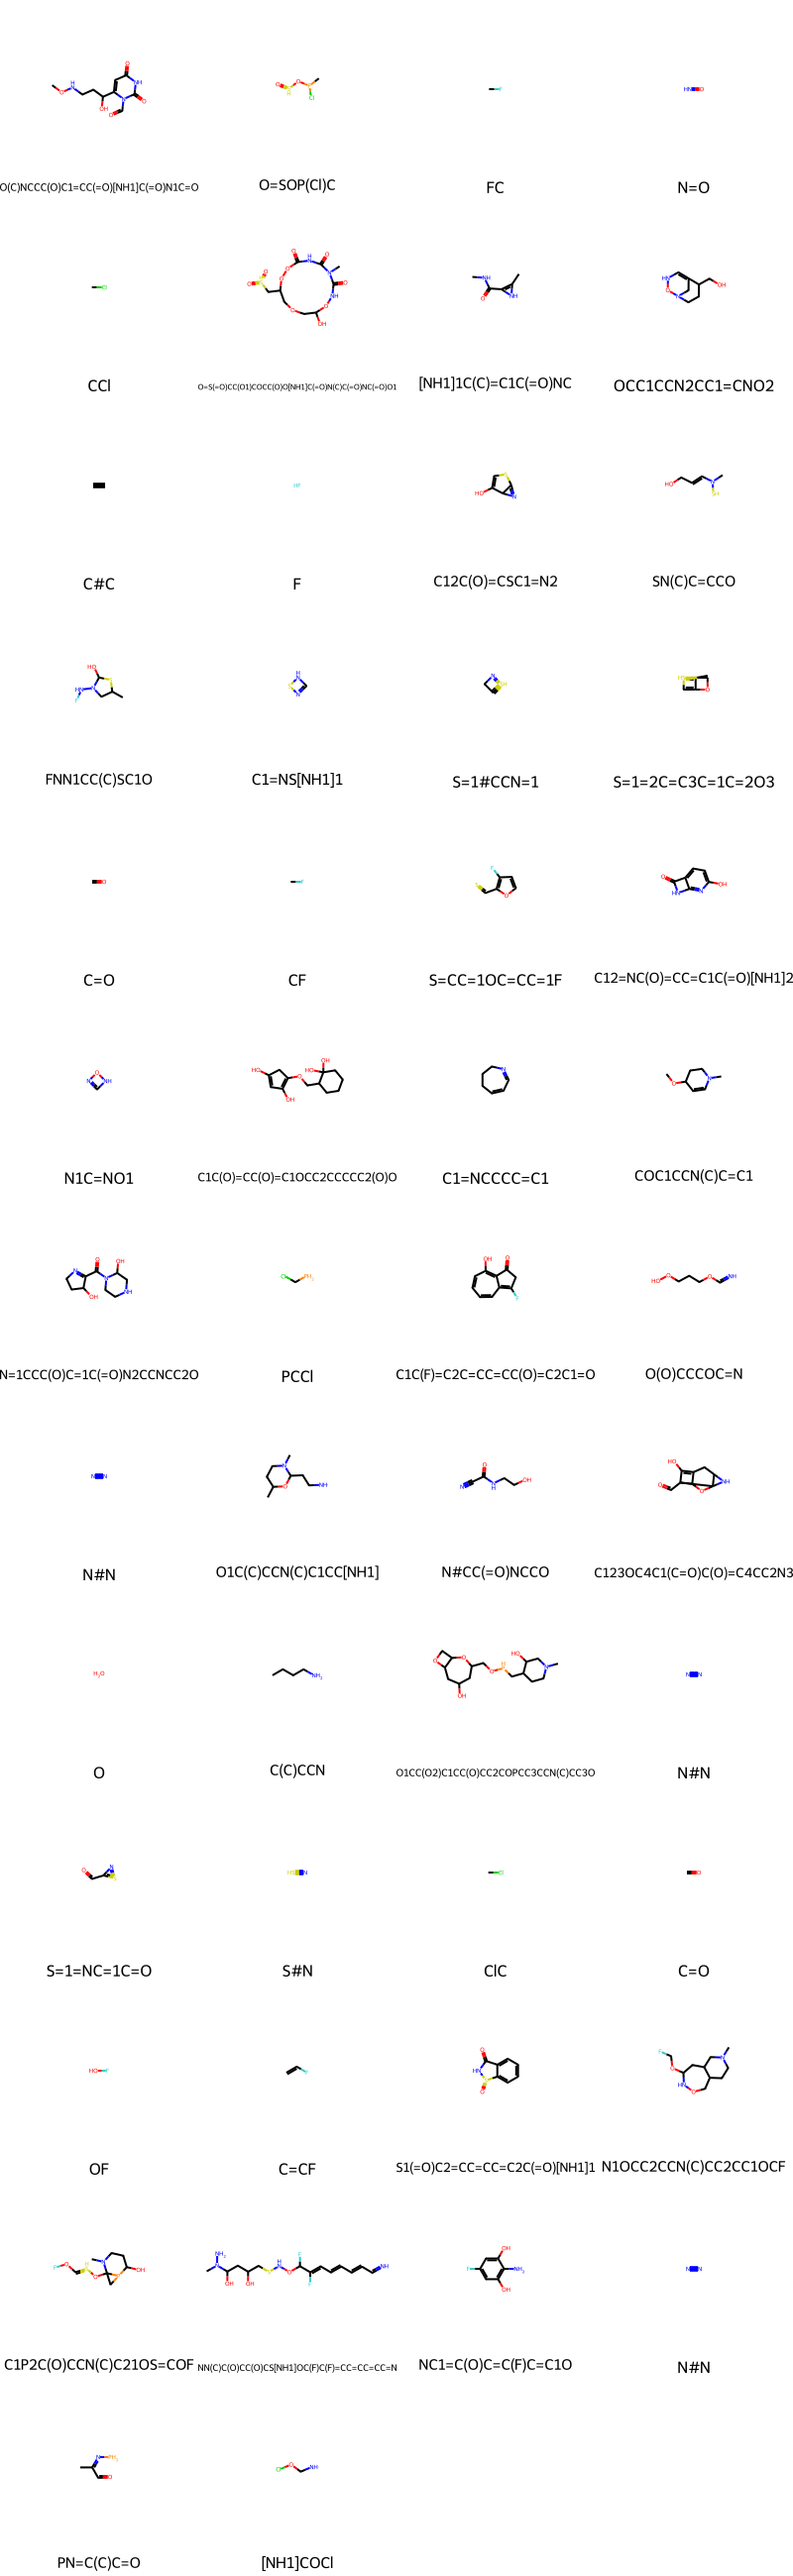

In [89]:

Draw.MolsToGridImage(
    df['mol'][:50],
    molsPerRow=4,
    subImgSize=(200, 200),
    legends=[x for x in df['SMILES'][:50]]  # Use SMILES instead of Name
)


## **Tanimoto Similarity**

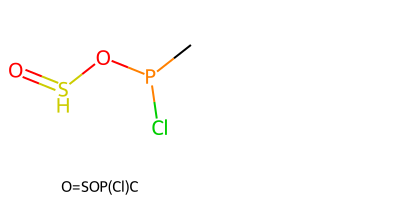

In [90]:
Draw.MolsToGridImage(df['mol'][1:2:1],molsPerRow=2,subImgSize=(200,200),legends=[x for x in df['SMILES'][1:2:1]])

In [91]:
mf_ba = AllChem.GetMorganFingerprintAsBitVect(df['mol'][1], radius=2, nBits = 2048)
mf_pe = AllChem.GetMorganFingerprintAsBitVect(df['mol'][1], radius=2, nBits = 2048)

In [92]:
# print the position and number of On bits
print(f'The bits are on at position {list(mf_ba.GetOnBits())}')
print(Counter(np.array(mf_ba)))

The bits are on at position [45, 146, 199, 211, 314, 650, 695, 720, 855, 1057, 1142, 1229, 1249, 1376, 1683]
Counter({0: 2033, 1: 15})


In [93]:
# print the position and number of On bits
print(f'The bits are on at position {list(mf_pe.GetOnBits())}')
print(Counter(np.array(mf_pe)))

The bits are on at position [45, 146, 199, 211, 314, 650, 695, 720, 855, 1057, 1142, 1229, 1249, 1376, 1683]
Counter({0: 2033, 1: 15})


In [94]:
set(mf_ba.GetOnBits()) & set(mf_pe.GetOnBits())

{45,
 146,
 199,
 211,
 314,
 650,
 695,
 720,
 855,
 1057,
 1142,
 1229,
 1249,
 1376,
 1683}

In [95]:
len(set(mf_ba.GetOnBits()) & set(mf_pe.GetOnBits()))

15

In [96]:
print(set(mf_ba.GetOnBits()) | set(mf_pe.GetOnBits()))
len(set(mf_ba.GetOnBits()) | set(mf_pe.GetOnBits()))

{199, 650, 1229, 720, 146, 211, 1683, 855, 1376, 1057, 1249, 45, 1142, 695, 314}


15

In [97]:
TanimotoSimilarity(mf_ba, mf_pe)

1.0

In [98]:
mf_bv = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 2048) for mol in df['mol']]


In [99]:
Tanimoto_similarity = [TanimotoSimilarity(mf_bv[4], x) for x in mf_bv]


In [100]:
# put the Tanimoto coefficient values into data frame.
df["ts_index"] = Tanimoto_similarity

In [101]:
df.to_csv("tanimoto_similarities.csv", index=False)
